## Loan Data from Prosper Data Analysis and Visulization

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Wrangling](#wrangle)
- [Part II - Exploratory Data Analysis](#analysis)
- [Part III - Conclusion](#conclusion)

<a id='intro'></a>
### Introduction
The dataset that we are interested is the dataset of 'Loan Data from Prosper', which contains information about the listing, borrower, propser, and loan. **We will maily focuse on the borrower's side in this project. **

A detailed introduction about the data set could be found at: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0 

After data wrangling and cleaning, we firstly looked into the borrower's state (location) and occupation, and their relationships with stated income. We also checked the relationship between the borrower's Annual Percentage Rate (APR) and interest rate for the loan. Lastly, we investigated the possible relationship among BorrowerRate, CreditScoreMean, AmountDelinquent, and StatedMonthlyIncome. A negative correlation between BorrowerRate and CreditScoreMean was found, which were further verified on groups of borrowers with different occupation. 


<a id='wrangle'></a>
### Part I - Data Wrangling

In this part, the data set was gathered, assessed, and cleaned. The cleaned result is stored in 'prosperLoanData_clean.csv' for further analysis and visulization. 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### 1. Data Gathering

In [2]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

> There are too many columns/attributes for the datafram, we will only focuse on columns of: ListingNumber, LoanStatus, BorrowerAPR, BorrowerRate, BorrowerState, Occupation, EmploymentStatus, CreditScoreRangeLower, CreditScoreRangeUpper, CurrentCreditLines, OpenRevolvingAccounts, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, IncomeRange, IncomeVerifiable, StatedMonthlyIncome. Other columns was be removed.

In [6]:
col_list=['ListingNumber', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'BorrowerState', 'Occupation', 'EmploymentStatus', 
          'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'CurrentDelinquencies', 
          'AmountDelinquent', 'DelinquenciesLast7Years', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome']
df_new=df[col_list]
df_new.head()

,ListingNumber,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,IncomeRange,IncomeVerifiable,StatedMonthlyIncome
0,193129,Completed,0.16516,0.1580,CO,Other,Self-employed,640.0,659.0,5.0,1,2.0,472.0,4.0,"$25,000-49,999",True,3083.333333
1,1209647,Current,0.12016,0.0920,CO,Professional,Employed,680.0,699.0,14.0,13,0.0,0.0,0.0,"$50,000-74,999",True,6125.000000
2,81716,Completed,0.28269,0.2750,GA,Other,Not available,480.0,499.0,NaN,0,1.0,NaN,0.0,Not displayed,True,2083.333333
3,658116,Current,0.12528,0.0974,GA,Skilled Labor,Employed,800.0,819.0,5.0,7,4.0,10056.0,14.0,"$25,000-49,999",True,2875.000000
4,909464,Current,0.24614,0.2085,MN,Executive,Employed,680.0,699.0,19.0,6,0.0,0.0,0.0,"$100,000+",True,9583.333333


#### 2. Data Assessing

In [17]:
df_new.shape

(113937, 17)

In [16]:
#check for missing data
sum(df_new.isna().any(axis=1))

10693

In [18]:
df_new.isnull().sum()

ListingNumber                 0
LoanStatus                    0
BorrowerAPR                  25
BorrowerRate                  0
BorrowerState              5515
Occupation                 3588
EmploymentStatus           2255
CreditScoreRangeLower       591
CreditScoreRangeUpper       591
CurrentCreditLines         7604
OpenRevolvingAccounts         0
CurrentDelinquencies        697
AmountDelinquent           7622
DelinquenciesLast7Years     990
IncomeRange                   0
IncomeVerifiable              0
StatedMonthlyIncome           0
dtype: int64

> There are 10,693 out of 113,937 rows have missing value in this dataframe. We will directly delete these rows sunce they accounts for less than 10% of this big data set. In addition, we have no information about these missing values. 

In [130]:
#Check for replication
len(df_new['ListingNumber'].unique())

290584

In [20]:
#Check for replication
sum(df_new.duplicated())

871

In [19]:
sum(df_new.ListingNumber.duplicated())

871

> There are 871 replicated rows in this dataframe.

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
ListingNumber              113937 non-null int64
LoanStatus                 113937 non-null object
BorrowerAPR                113912 non-null float64
BorrowerRate               113937 non-null float64
BorrowerState              108422 non-null object
Occupation                 110349 non-null object
EmploymentStatus           111682 non-null object
CreditScoreRangeLower      113346 non-null float64
CreditScoreRangeUpper      113346 non-null float64
CurrentCreditLines         106333 non-null float64
OpenRevolvingAccounts      113937 non-null int64
CurrentDelinquencies       113240 non-null float64
AmountDelinquent           106315 non-null float64
DelinquenciesLast7Years    112947 non-null float64
IncomeRange                113937 non-null object
IncomeVerifiable           113937 non-null bool
StatedMonthlyIncome        113937 non-null float64
dtypes: bool(1), float64(9), int64

> This data set looks pretty clear. All data is stored in the approperiate format.

#### 2. Data cleaning

In this part, the cleaning process followed the sequence of "Define, Code, and Test".

`1.` Make a copy of the dataframes before cleaning

In [21]:
df_clean=df_new.copy()

`2.` Define: drop rows with missing value 

In [23]:
#code
df_clean.dropna(inplace=True)
#test
sum(df_clean.isna().any(axis=1))

812

`3.` Define: drop replicated rows

In [24]:
#code
df_clean.drop_duplicates(inplace=True)
#test
sum(df_clean.duplicated())

0

`4.` Define: creat a new column named as CreditScoreMean, which is calculted as the mean of CreditScoreRangeLower and CreditScoreRangeUpper. This data could be used as the credit score for borrowers.

In [25]:
#code
df_clean['CreditScoreMean'] = (df_clean['CreditScoreRangeLower']+df_clean['CreditScoreRangeUpper'])/2
#test
df_clean.head()

,ListingNumber,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,CreditScoreMean
0,193129,Completed,0.16516,0.1580,CO,Other,Self-employed,640.0,659.0,5.0,1,2.0,472.0,4.0,"$25,000-49,999",True,3083.333333,649.5
1,1209647,Current,0.12016,0.0920,CO,Professional,Employed,680.0,699.0,14.0,13,0.0,0.0,0.0,"$50,000-74,999",True,6125.000000,689.5
3,658116,Current,0.12528,0.0974,GA,Skilled Labor,Employed,800.0,819.0,5.0,7,4.0,10056.0,14.0,"$25,000-49,999",True,2875.000000,809.5
4,909464,Current,0.24614,0.2085,MN,Executive,Employed,680.0,699.0,19.0,6,0.0,0.0,0.0,"$100,000+",True,9583.333333,689.5
5,1074836,Current,0.15425,0.1314,NM,Professional,Employed,740.0,759.0,21.0,13,0.0,0.0,0.0,"$100,000+",True,8333.333333,749.5


`5.` Store the cleaned dataframe as 'prosperLoanData_clean.csv'

In [139]:
df_clean.to_csv('prosperLoanData_clean.csv')

<a id='analysis'></a>
### Part II - Exploratory Data Analysis  

#### 1. Univeriate Analysis

In [26]:
df_clean=pd.read_csv('prosperLoanData_clean.csv')
df_clean.head()

,Unnamed: 0,ListingNumber,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,CreditScoreMean
0,0,193129,Completed,0.16516,0.1580,CO,Other,Self-employed,640.0,659.0,5.0,1,2.0,472.0,4.0,"$25,000-49,999",True,3083.333333,649.5
1,1,1209647,Current,0.12016,0.0920,CO,Professional,Employed,680.0,699.0,14.0,13,0.0,0.0,0.0,"$50,000-74,999",True,6125.000000,689.5
2,3,658116,Current,0.12528,0.0974,GA,Skilled Labor,Employed,800.0,819.0,5.0,7,4.0,10056.0,14.0,"$25,000-49,999",True,2875.000000,809.5
3,4,909464,Current,0.24614,0.2085,MN,Executive,Employed,680.0,699.0,19.0,6,0.0,0.0,0.0,"$100,000+",True,9583.333333,689.5
4,5,1074836,Current,0.15425,0.1314,NM,Professional,Employed,740.0,759.0,21.0,13,0.0,0.0,0.0,"$100,000+",True,8333.333333,749.5


> Where do the borrowers come from?

Text(0.5,1,'The Distibution of Borrowers State')

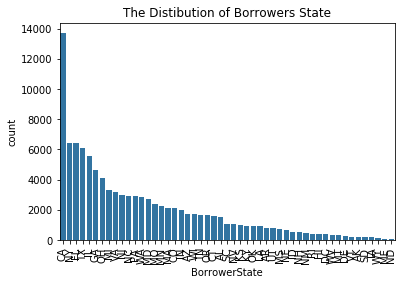

In [27]:
base_color = sb.color_palette()[0]
cat_order = df_clean['BorrowerState'].value_counts().index
sb.countplot(data = df_clean, x = 'BorrowerState', color = base_color, order = cat_order)
plt.xticks(rotation=90)
plt.title('The Distibution of Borrowers State')

> What do the borrowers do?

Text(0.5,1,'The top 20 Borrower Occupations')

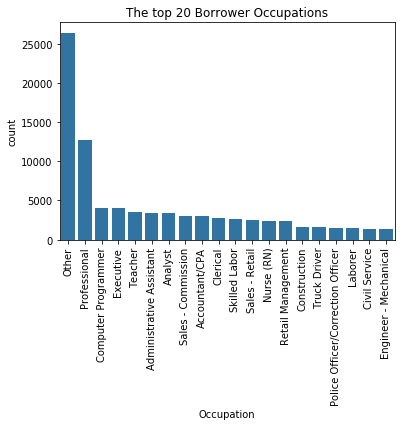

In [30]:
cat_order = df_clean['Occupation'].value_counts().index[0:20]
sb.countplot(data = df_clean, x = 'Occupation', color = base_color, order = cat_order)
plt.xticks(rotation=90)
plt.title('The top 20 Borrower Occupations')

> How much do they earn monthly as stated by themselves?

Text(0.5,1,'Monthly Income distribution($0-25,000)')

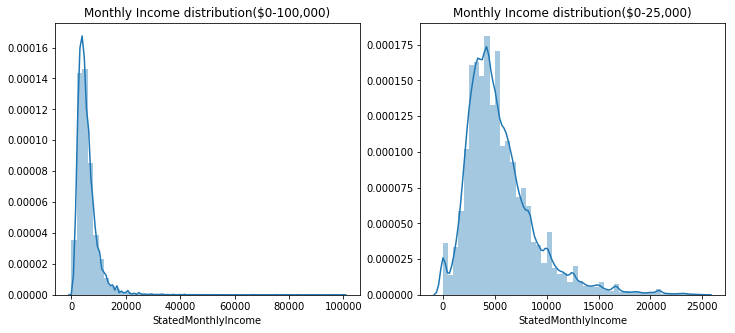

In [31]:
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
sb.distplot(df_clean['StatedMonthlyIncome'])
plt.title('Monthly Income distribution($0-100,000)')
plt.subplot(1, 2, 2)
sb.distplot(df_clean[df_clean['StatedMonthlyIncome']<25000]['StatedMonthlyIncome'])
plt.title('Monthly Income distribution($0-25,000)')

#### 2. Bivariate Analysis

>How's the stated income distributed for borrowers from different state with monthly income 0-25,000 dollars?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

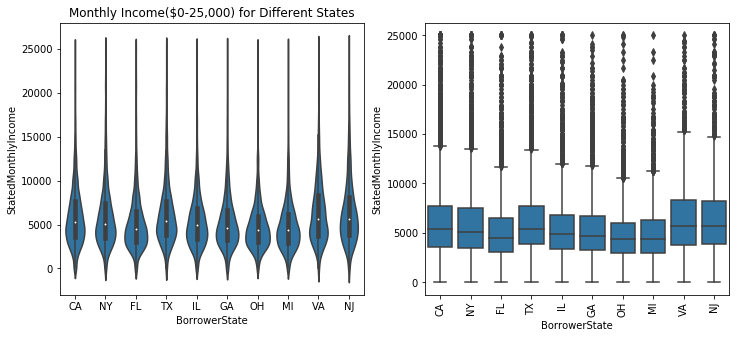

In [32]:
df_temp=df_clean.drop(df_clean[df_clean['StatedMonthlyIncome']>25000].index) 
cat_order1 = df_clean['BorrowerState'].value_counts().index[0:10]

plt.figure(figsize = [12, 5])
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_temp, x = 'BorrowerState', y = 'StatedMonthlyIncome', color = base_color, order = cat_order1)
plt.title('Monthly Income($0-25,000) for Different States')
# right plot: box plot
plt.subplot(1, 2, 2)
ax1 = sb.boxplot (data = df_temp, x = 'BorrowerState', y = 'StatedMonthlyIncome', color = base_color, order = cat_order1)
plt.xticks(rotation=90)

>How's the stated income distributed for borrowers with different occupation with monthly income 0-25,000 dollars?

Text(0.5,1,'Monthly Income($0-25,000) for Different Occupation')

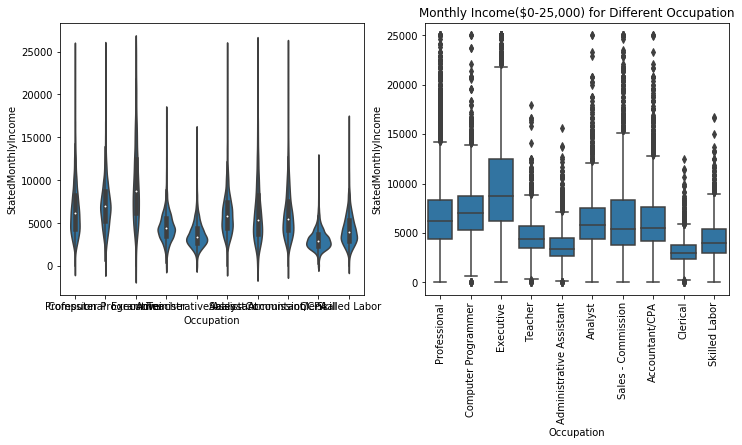

In [33]:
cat_order2 = df_clean['Occupation'].value_counts().index[1:11]
plt.figure(figsize = [12, 5])
# left plot: state
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_temp, x = 'Occupation', y = 'StatedMonthlyIncome', color = base_color, order = cat_order2)
# right plot: box plot
plt.subplot(1, 2, 2)
ax1 = sb.boxplot(data = df_temp, x = 'Occupation', y = 'StatedMonthlyIncome', color = base_color, order = cat_order2)
plt.xticks(rotation=90)
plt.title('Monthly Income($0-25,000) for Different Occupation')

> Linear relationship between BorrowerAPR and BorrowerRate?

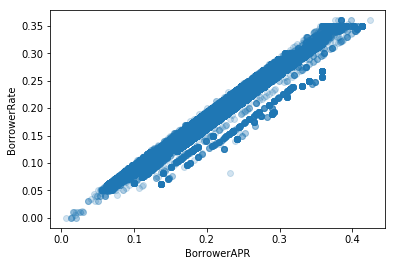

In [34]:
sb.regplot(data = df_clean, x = 'BorrowerAPR', y = 'BorrowerRate', fit_reg = False,
            scatter_kws = {'alpha' : 1/5})

#### 2. Multivariate Analysis

>Any relationship among BorrowerRate, CreditScoreMean, AmountDelinquent, and StatedMonthlyIncome?

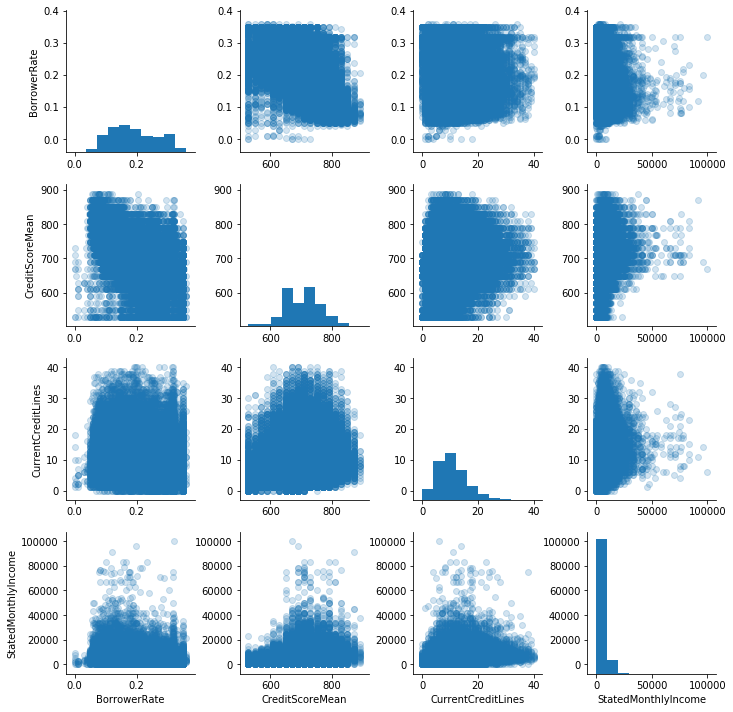

In [35]:
g = sb.PairGrid(data = df_clean, vars = ['BorrowerRate', 'CreditScoreMean', 'CurrentCreditLines','StatedMonthlyIncome'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter,alpha=.2)

>Overplotted. Try to use subset from the big datafram

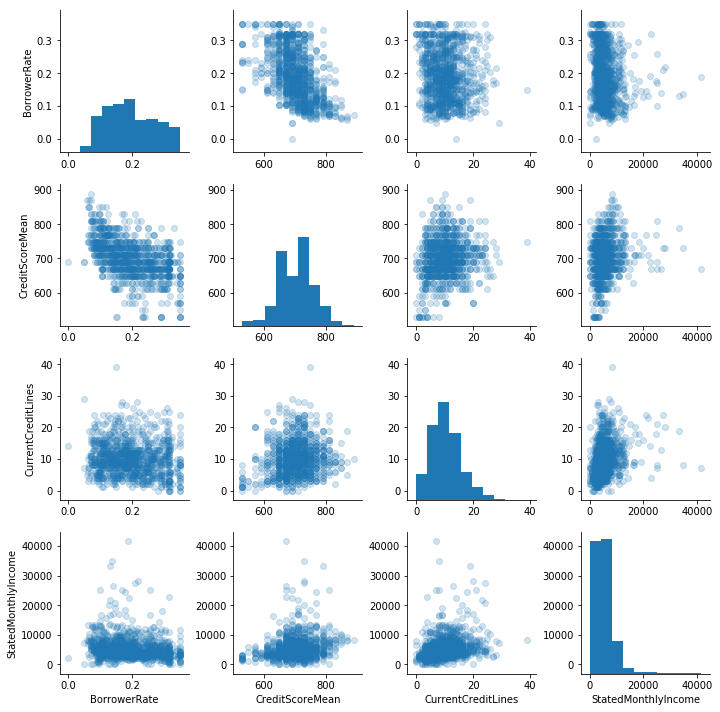

In [38]:
df_sub=df_clean.sample(1000)
g = sb.PairGrid(data = df_sub, vars = ['BorrowerRate', 'CreditScoreMean', 'CurrentCreditLines','StatedMonthlyIncome'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter,alpha=.2)

> How's this relationship between BorrowerRate and CreditScoreMean the top 3 occupations?


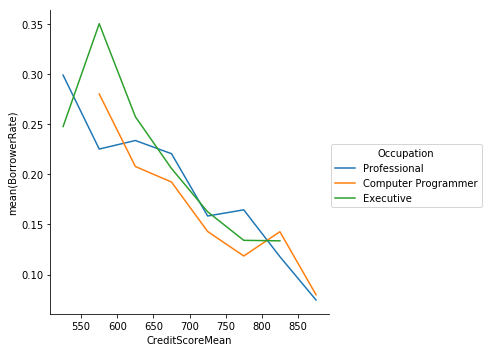

In [39]:
def mean_poly(x, y, bins = 100, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+10)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

cat_list = df_clean['Occupation'].value_counts().index[1:4]
bin_edges = np.arange(500, df_clean['CreditScoreMean'].max()+50, 50)
g = sb.FacetGrid(data = df_clean[df_clean['Occupation'].isin(cat_list)].sample(500), hue = 'Occupation', size = 5)
g.map(mean_poly, 'CreditScoreMean', 'BorrowerRate', bins = bin_edges)
g.set_ylabels('mean(BorrowerRate)')
g.add_legend()

<a id='conclusion'></a>
### Part III - Conclusions

To sum up, we mainly answered the following questions:

**Where do the borrowers come from? What do they do? **

>The top 5 states where the borrowers come from are Califonia, New York, Florida, Texas, Illinois. The top 5 occupations of the borrowers come from are Professional, Compute Programmer, Executive, Teache, and Admistrative Assistant. 

**How's the stated income distributed for borrowers from different state/occupation?**

>Most borrowers have a stated monthly income around 5,000 dollars. Occupation tends to have a larger impact on income campared with location/state.

**Any relationship among BorrowerRate, CreditScoreMean, AmountDelinquent, and StatedMonthlyIncome?**
>A negative correlation between BorrowerRate and CreditScoreMean was observed: a borrower with better credit history is expected to have lower loan interest. This trean was further testfied in the borrowers with the top 3 occupations (Professional, Compute Programmer, Executive)



## Submit


In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0